In [1]:
!pip install pandas openpyxl

In [2]:
import pandas as pd

excel_vals = pd.read_excel('TaskData.xlsx', header=None).values
num_words = len(excel_vals)
words = []
options = ['doctor', 'lawyer', 'teacher', 'engineer', 'accountant', 'nurse', 'police', 'architect', 'dentist', 'pharmacist']
for i in range(num_words):
    words.append(excel_vals[i][0].replace("'", "").strip().lower())
words

['cokter',
 'dentiists',
 'enginir',
 'police',
 'engneiear',
 'doctro',
 'dentists',
 'police',
 'enjeineaar',
 'dentistt',
 'nusye',
 'teacher',
 'docktor',
 'nusre',
 'architeft',
 'teacher',
 'engeineer',
 'dentists',
 'police',
 'enjineer',
 'engeniiar',
 'enginear',
 'accountant',
 'teacher',
 'police',
 'denstists',
 'pharmaccist',
 'doktur',
 'police',
 'deist',
 'doctuor',
 'dentists',
 'doktoor',
 'denisst',
 'doctore',
 'lawyree',
 'denttst',
 'dactar',
 'doctuer',
 'teacher',
 'teacher',
 'doktr',
 'doctar',
 'police',
 'teacher',
 'enjinear',
 'teacher',
 'enjneear',
 'teacher',
 'architekct',
 'engineer',
 'pharmasict',
 'police',
 'enjeneer',
 'denist',
 'nusrqe',
 'accountant',
 'dentsists',
 'teacher',
 'police',
 'doctara',
 'arkhitect',
 'enjeeneear',
 'archatekt',
 'dactur',
 'lawyer',
 'enginnir',
 'denstist',
 'teacher',
 'enjeeneer',
 'enjineeer',
 'police',
 'teacher',
 'architet',
 'lawyr',
 'enjeenir',
 'accountant',
 'teacher',
 'engenier',
 'police',
 'engie

In [3]:
def create_bigram_set(word):
    bigram_set = []
    for i in range(len(word)-1):
        bigram_set.append(word[i]+word[i+1])
    return set(bigram_set)

create_bigram_set("doctor")
    

{'ct', 'do', 'oc', 'or', 'to'}

In [4]:
option_bigrams = [create_bigram_set(option) for option in options]
word_bigrams = [create_bigram_set(word) for word in words]

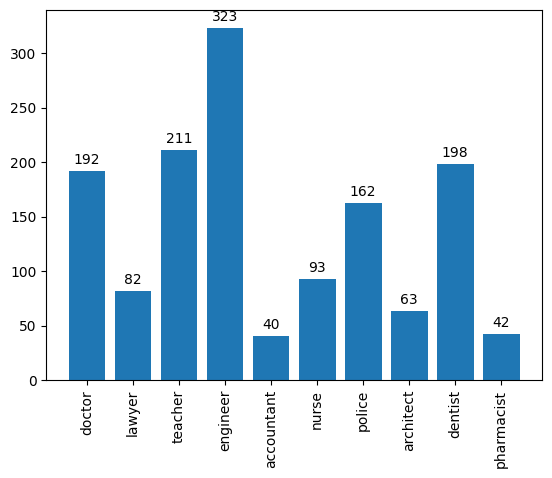

In [5]:
import numpy as np
import matplotlib.pyplot as plt

correct_words_jaccard = []
option_counter = [0] * len(options)
for word_bigram in word_bigrams:
    j_values = []
    for option_bigram in option_bigrams:
        j_values.append(len(word_bigram.intersection(option_bigram))/len(word_bigram.union(option_bigram)))
    correct_words_jaccard.append(options[np.argmax(j_values)])
    option_counter[np.argmax(j_values)] += 1

fig, ax = plt.subplots()
pps = ax.bar(options, option_counter)
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
ax.xaxis.set_ticks(options)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

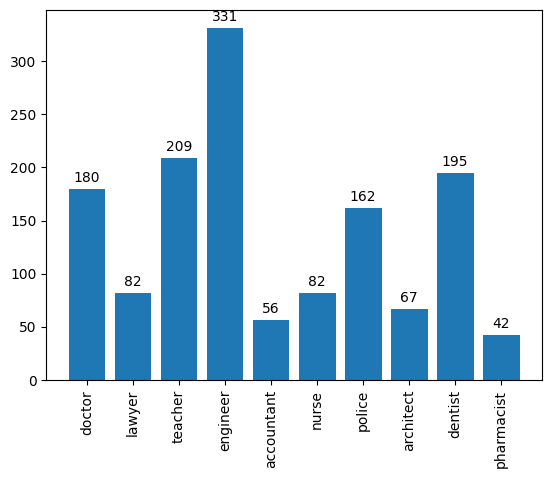

In [6]:
correct_words_cosine = []
option_counter = [0] * len(options)

option_vecs = []
for option_bigram in option_bigrams:
    option_vec = np.zeros(26*26, dtype=np.int32)
    for pair in option_bigram:
        option_vec[(ord(pair[0])-97)*26+ord(pair[0])-97] += 1
    option_vecs.append(option_vec)

for word_bigram in word_bigrams:
    word_vec = np.zeros(26*26, dtype=np.int32)
    similarities = []
    for pair in word_bigram:
        word_vec[(ord(pair[0])-97)*26+ord(pair[0])-97] += 1
    for option_vec in option_vecs:
        similarities.append(np.dot(word_vec, option_vec)/(np.linalg.norm(word_vec)*np.linalg.norm(option_vec)))
    correct_words_cosine.append(options[np.argmax(similarities)])
    option_counter[np.argmax(similarities)] += 1

fig, ax = plt.subplots()
pps = ax.bar(options, option_counter)
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
ax.xaxis.set_ticks(options)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


In [19]:
def lev(a, b, i, j, matrix):
    if matrix[i-1][j-1] != -1:
        return matrix[i-1][j-1]
    if min(i, j) == 0:
        return max(i, j)
    return min(
        lev(a, b, i-1, j, matrix) + 1,
        lev(a, b, i, j-1, matrix) + 1,
        lev(a, b, i-1, j-1, matrix) + (1 if a[i-1] != b[j-1] else 0) 
    )
def lev_distance(a, b):
    matrix = np.full((len(a), len(b)), -1, dtype=np.int32)
    for i in range(0, len(a)):
        for j in range(0, len(b)):
            matrix[i][j] = lev(a,b,i+1,j+1, matrix)
    return matrix[len(a)-1][len(b)-1]

3

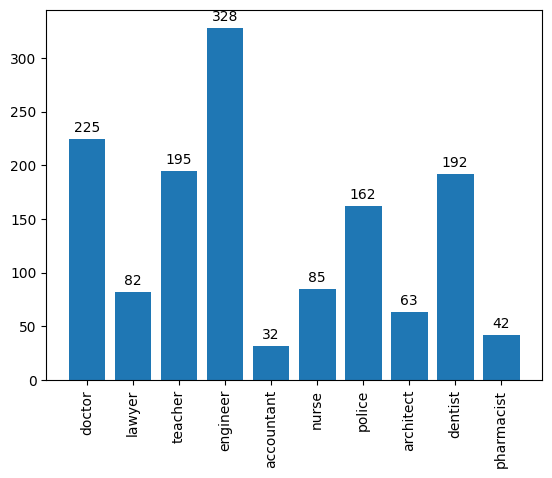

In [18]:
correct_words_lev = []
option_counter = [0] * len(options)

for word in words:
    distances = []
    for option in options:
        distances.append(lev_distance(word, option))
    correct_words_lev.append(options[np.argmin(distances)])
    option_counter[np.argmin(distances)] += 1

fig, ax = plt.subplots()
pps = ax.bar(options, option_counter)
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
ax.xaxis.set_ticks(options)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()